In [1]:
# -*- coding:utf-8 -*-
# author : apollo2mars@gmail.com
# do some experiment with random forest
# ref : http://sklearn.apachecn.org/cn/0.19.0/modules/classes.html#module-sklearn.tree

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.
/home/apollo/softwares/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
def func(X_test, y_test):
    ## predict
    y_prd = clf.predict(X_test)

    ## accuracy
    from sklearn.metrics import accuracy_score
    print(accuracy_score(y_test, y_prd))

    ## P R F1
    from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
    print(precision_score(y_test, y_prd, average='macro'))
    print(recall_score(y_test, y_prd, average='macro'))
    print(f1_score(y_test, y_prd, average='macro'))

    ## confusion_matrix
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test, y_prd))

    ## 绘图
    importances = clf.feature_importances_
    importances = importances.reshape((28, 28))
    import matplotlib.pyplot as plt
    plt.matshow(importances, cmap=plt.cm.hot)
    plt.title("Pixel importances for decision tree")
    plt.show()

In [4]:
img_rows, img_cols = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print('X_train shape:', X_train.shape)
print(X_train.shape, 'train samples')
print('X_test shape:', X_test.shape)
print(X_test.shape, 'test samples')

X_train shape: (60000, 784)
(60000, 784) train samples
X_test shape: (10000, 784)
(10000, 784) test samples


test scores is 0.8773
0.8773
0.875858055572
0.875854557069
0.875809947869
[[ 918    0    7    7    5    8   15    4    7    9]
 [   0 1090    7    7    2    5    6    2   14    2]
 [  11    8  878   40   17   13   10   20   26    9]
 [   8    5   31  853   10   47    3   10   23   20]
 [   4    1    8    4  853   10   16   11   25   50]
 [  11    4    5   42    5  751   20    7   31   16]
 [  17    4   11    8   21   19  852    2   20    4]
 [   3    9   27   17   11    7    0  928    9   17]
 [  13    3   26   36   21   30   18    8  792   27]
 [  13    2    6   19   43   11    5   21   31  858]]


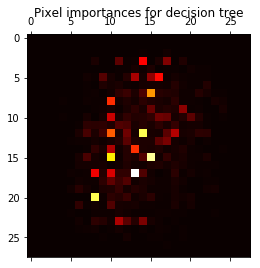

In [7]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
scores = clf.score(X_test, y_test)
print('test scores is {}'.format(scores))
func(X_test, y_test)

test scores is 0.9247
0.9247
0.924879284083
0.923687730938
0.923914266232
[[ 962    1    0    0    1    5    4    1    5    1]
 [   0 1118    5    3    0    3    2    0    4    0]
 [   7    4  947   13    6    1   14   16   17    7]
 [   5    2   14  912    2   29    0   13   20   13]
 [   4    1    2    1  880    3   11    1    9   70]
 [   8    6    3   32    8  785   12    4   17   17]
 [  14    3    2    0    4    6  923    2    4    0]
 [   2    9   25    2   11    0    1  922    8   48]
 [   3    7    9   16   17   11   11    4  874   22]
 [   4    6    4   13   24    7    2   11   14  924]]


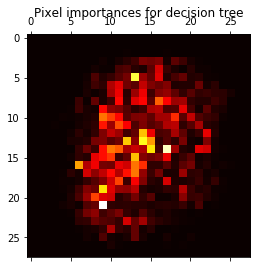

In [8]:
# random forest
# https://blog.csdn.net/u012102306/article/details/52228516
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
scores = clf.score(X_test, y_test)
print('test scores is {}'.format(scores))
func(X_test, y_test)

test scores is 0.7299
0.7299
0.726341980857
0.726809063202
0.723022792946
[[ 883    0   25    3    4   28   23    3    3    8]
 [   0 1070    3    8    3    1    4   25   21    0]
 [  30   35  596   32   18    8  208   25   75    5]
 [  28   32   19  678    2   92   30   33   74   22]
 [   4    2   17   14  708   16   10   80   35   96]
 [  29   32    6  122   27  526   22   19   71   38]
 [  20   10   35    6   26   32  822    1    6    0]
 [   7   16   23    8   14    7    1  804   20  128]
 [  40   48   11   91   15   34   22   18  661   34]
 [   9   11   23   32  161   18    1  169   34  551]]


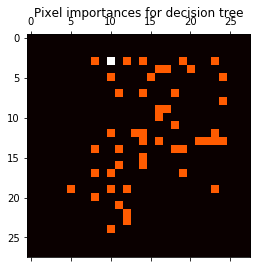

In [9]:
## adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
scores = clf.score(X_test, y_test)
print('test scores is {}'.format(scores))
func(X_test, y_test)

test scores is 0.9487
0.9487
0.948410297773
0.948181456856
0.948216163977
[[ 966    0    1    0    0    3    4    2    4    0]
 [   0 1120    3    1    1    1    4    0    5    0]
 [   9    0  963   12    8    1    6   12   18    3]
 [   0    0   11  951    1   11    1   12   14    9]
 [   0    0    3    0  936    1    6    1    7   28]
 [   3    2    1   20    2  826   11    3   14   10]
 [   7    3    0    0    8   14  921    0    5    0]
 [   2    9   24    7    4    2    0  951    5   24]
 [   5    4    3   11    8    7    5    5  912   14]
 [   7    8    2   13   20    6    0    6    6  941]]


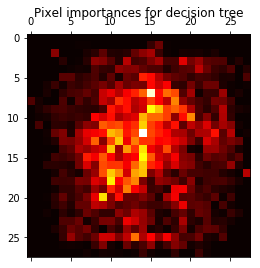

In [10]:
## GBDT
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
scores = clf.score(X_test, y_test)
print('test scores is {}'.format(scores))
func(X_test, y_test)

In [1]:
## XGboost
import xgboost as xgb
import numpy as np
# read in data
# dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
# dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
clf = xgb.train(param, X_train, y_train)
func(X_test, y_test)

ModuleNotFoundError: No module named 'xgboost'

[1]	valid_0's auc: 0.99033	valid_0's l2: 23.7407
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.992588	valid_0's l2: 23.5572
[3]	valid_0's auc: 0.993073	valid_0's l2: 23.3836
[4]	valid_0's auc: 0.996868	valid_0's l2: 23.2208
[5]	valid_0's auc: 0.996931	valid_0's l2: 23.0658
[6]	valid_0's auc: 0.996901	valid_0's l2: 22.9196
[7]	valid_0's auc: 0.996907	valid_0's l2: 22.7817
[8]	valid_0's auc: 0.997538	valid_0's l2: 22.651
[9]	valid_0's auc: 0.997597	valid_0's l2: 22.5273
[10]	valid_0's auc: 0.997628	valid_0's l2: 22.4101
[11]	valid_0's auc: 0.997938	valid_0's l2: 22.2991
[12]	valid_0's auc: 0.99795	valid_0's l2: 22.1937
[13]	valid_0's auc: 0.997957	valid_0's l2: 22.0941
[14]	valid_0's auc: 0.997928	valid_0's l2: 21.9997
[15]	valid_0's auc: 0.997951	valid_0's l2: 21.9104
[16]	valid_0's auc: 0.998071	valid_0's l2: 21.826
[17]	valid_0's auc: 0.998126	valid_0's l2: 21.7454
[18]	valid_0's auc: 0.998243	valid_0's l2: 21.669
[19]	valid_0's auc: 0.998282	valid_

Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x7f614cffc3c8>>
Traceback (most recent call last):
  File "/home/apollo/softwares/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 742, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


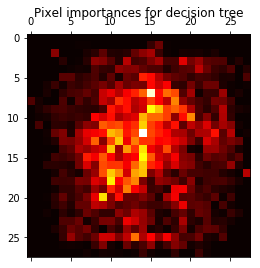

In [15]:
## LightGBM
# https://blog.csdn.net/luoyexuge/article/details/72956491
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
func(X_test, y_test)

In [ ]:
# ## P R F1
# from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
# # p, r, threholds = precision_recall_curve(y_test, y_prd) ## 只能用在二值分类上 
# # print(" p is {}, r is {}, threholds is ".format(p, r, threholds))

# print(precision_score(y_test, y_prd, average='macro'))
# print(recall_score(y_test, y_prd, average='macro'))
# print(f1_score(y_test, y_prd, average='macro'))

# ## average precesion
# # multiclass format is not supported
# # from sklearn.metrics import average_precision_score
# # print(average_precision_score(y_test, y_prd))

# ## P R F1
# ## 只能用在二值分类上 
# from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
# p, r, threholds = precision_recall_curve(y_test, y_prd)
# print(" p is {}, r is {}, threholds is ".format(p, r, threholds))

## roc auc 只能用在二值分类上 
# from sklearn import metrics
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prd)
# print(metrics(fpr,tpr))

In [ ]:
## 保存
dot_data = StringIO.StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("Dtree.pdf")
print "The Decision Tree was saved!"